In [7]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

pd.set_option('display.float_format', lambda x: '{:.2f}'.format(x))
np.set_printoptions(suppress=True)

In [8]:
df_customers = pd.read_csv("dataset/customers.csv")
df_loans = pd.read_csv("dataset/loans.csv")
df_bureau = pd.read_csv("dataset/bureau_data.csv")

In [9]:
df_customers.shape, df_loans.shape, df_bureau.shape

((50000, 12), (50000, 15), (50000, 8))

In [10]:
df_customers.head(3)

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,state,zipcode
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,Delhi,110001
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,Tamil Nadu,600001
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,West Bengal,700001


In [11]:
df_loans.head(3)

,loan_id,cust_id,loan_purpose,loan_type,sanction_amount,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default
0,L00001,C00001,Auto,Secured,3004000,2467000,49340.00,444060,1973600,33,1630408,873386,2019-07-24,2019-08-10,False
1,L00002,C00002,Home,Secured,4161000,3883000,77660.00,698940,3106400,30,709309,464100,2019-07-24,2019-08-15,False
2,L00003,C00003,Personal,Unsecured,2401000,2170000,43400.00,390600,1736000,21,1562399,1476042,2019-07-24,2019-08-21,False


In [12]:
df_bureau.head(3)

,cust_id,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio
0,C00001,1,1,42,0,0,3,7
1,C00002,3,1,96,12,60,5,4
2,C00003,2,1,82,24,147,6,58


In [16]:
df = pd.merge(df_customers,df_loans,on="cust_id")
df.head()

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,...,2467000,49340.00,444060,1973600,33,1630408,873386,2019-07-24,2019-08-10,False
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,...,3883000,77660.00,698940,3106400,30,709309,464100,2019-07-24,2019-08-15,False
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,...,2170000,43400.00,390600,1736000,21,1562399,1476042,2019-07-24,2019-08-21,False
3,C00004,55,F,Single,Self-Employed,3547000,1,Owned,15,Bangalore,...,1747000,34940.00,314460,1397600,6,1257839,1031094,2019-07-24,2019-08-09,False
4,C00005,37,M,Married,Salaried,3432000,3,Owned,28,Pune,...,4520000,90400.00,813600,3616000,28,1772334,1032458,2019-07-24,2019-08-02,False


In [18]:
df=pd.merge(df,df_bureau,on = 'cust_id')
df

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,total_dpd_x,enquiry_count_x,credit_utilization_ratio_x,number_of_open_accounts_y,number_of_closed_accounts_y,total_loan_months_y,delinquent_months_y,total_dpd_y,enquiry_count_y,credit_utilization_ratio_y
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,...,0,3,7,1,1,42,0,0,3,7
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,...,60,5,4,3,1,96,12,60,5,4
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,...,147,6,58,2,1,82,24,147,6,58
3,C00004,55,F,Single,Self-Employed,3547000,1,Owned,15,Bangalore,...,87,5,26,3,0,115,15,87,5,26
4,C00005,37,M,Married,Salaried,3432000,3,Owned,28,Pune,...,0,5,10,4,2,120,0,0,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,C49996,40,F,Single,Salaried,775000,2,Owned,11,Chennai,...,6,8,24,4,2,165,1,6,8,24
49996,C49997,39,M,Single,Salaried,3117000,0,Owned,9,Kolkata,...,0,4,91,4,0,161,0,0,4,91
49997,C49998,45,F,Single,Self-Employed,1329000,0,Rented,27,Bangalore,...,0,7,38,4,1,42,0,0,7,38
49998,C49999,42,F,Single,Self-Employed,533000,2,Mortgage,20,Hyderabad,...,47,4,17,1,2,42,9,47,4,17


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   cust_id                      50000 non-null  object 
 1   age                          50000 non-null  int64  
 2   gender                       50000 non-null  object 
 3   marital_status               50000 non-null  object 
 4   employment_status            50000 non-null  object 
 5   income                       50000 non-null  int64  
 6   number_of_dependants         50000 non-null  int64  
 7   residence_type               49938 non-null  object 
 8   years_at_current_address     50000 non-null  int64  
 9   city                         50000 non-null  object 
 10  state                        50000 non-null  object 
 11  zipcode                      50000 non-null  int64  
 12  loan_id                      50000 non-null  object 
 13  loan_purpose    

In [21]:
df['default']= df['default'].astype(int)
df['default']

0        0
1        0
2        0
3        0
4        0
        ..
49995    0
49996    0
49997    0
49998    0
49999    0
Name: default, Length: 50000, dtype: int64

In [22]:
X = df.drop("default", axis="columns")
y = df['default']

X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,test_size=0.25,random_state=42)

df_train = pd.concat([X_train, y_train], axis="columns")
df_test = pd.concat([X_test, y_test], axis="columns")

df_train.head(2)

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,enquiry_count_x,credit_utilization_ratio_x,number_of_open_accounts_y,number_of_closed_accounts_y,total_loan_months_y,delinquent_months_y,total_dpd_y,enquiry_count_y,credit_utilization_ratio_y,default
12746,C12747,59,M,Married,Self-Employed,11327000,3,Owned,30,Hyderabad,...,4,36,4,2,152,20,118,4,36,0
32495,C32496,44,F,Single,Salaried,715000,0,Owned,27,Mumbai,...,5,5,3,1,160,10,62,5,5,0


In [23]:
df_train.shape

(37500, 40)

In [24]:
df_train.isna().sum()

cust_id                         0
age                             0
gender                          0
marital_status                  0
employment_status               0
income                          0
number_of_dependants            0
residence_type                 47
years_at_current_address        0
city                            0
state                           0
zipcode                         0
loan_id                         0
loan_purpose                    0
loan_type                       0
sanction_amount                 0
loan_amount                     0
processing_fee                  0
gst                             0
net_disbursement                0
loan_tenure_months              0
principal_outstanding           0
bank_balance_at_application     0
disbursal_date                  0
installment_start_dt            0
number_of_open_accounts_x       0
number_of_closed_accounts_x     0
total_loan_months_x             0
delinquent_months_x             0
total_dpd_x   

In [25]:
mode_residence = df_train.residence_type.mode()[0]
mode_residence

'Owned'

In [26]:
df_train.residence_type.fillna(mode_residence, inplace=True)
df_test.residence_type.fillna(mode_residence, inplace=True)

df_train.residence_type.unique(), df_test.residence_type.unique()

C:\Users\M.Zaid Naeem\AppData\Local\Temp\ipykernel_10644\2805913581.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train.residence_type.fillna(mode_residence, inplace=True)
C:\Users\M.Zaid Naeem\AppData\Local\Temp\ipykernel_10644\2805913581.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always b

(array(['Owned', 'Mortgage', 'Rented'], dtype=object),
 array(['Owned', 'Mortgage', 'Rented'], dtype=object))

In [29]:
df_train.duplicated().sum()

np.int64(0)

In [30]:
df_train.describe()

,age,income,number_of_dependants,years_at_current_address,zipcode,sanction_amount,loan_amount,processing_fee,gst,net_disbursement,...,enquiry_count_x,credit_utilization_ratio_x,number_of_open_accounts_y,number_of_closed_accounts_y,total_loan_months_y,delinquent_months_y,total_dpd_y,enquiry_count_y,credit_utilization_ratio_y,default
count,37500.00,37500.00,37500.00,37500.00,37500.00,37500.00,37500.00,37500.00,37500.00,37500.00,...,37500.00,37500.00,37500.00,37500.00,37500.00,37500.00,37500.00,37500.00,37500.00,37500.00
mean,39.54,2633326.16,1.94,16.00,418866.25,4699691.57,3996067.73,80290.68,719292.19,3196854.19,...,5.01,43.42,2.50,1.00,76.11,4.84,26.67,5.01,43.42,0.09
std,9.86,2623780.52,1.54,8.92,169035.02,6257832.98,5371862.29,113128.14,966935.21,4297489.83,...,2.03,29.39,1.12,0.81,43.77,5.84,32.78,2.03,29.39,0.28
min,18.00,0.00,0.00,1.00,110001.00,0.00,0.00,0.00,0.00,0.00,...,1.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00
25%,33.00,802000.00,0.00,8.00,302001.00,1142000.00,961000.00,19220.00,172980.00,768800.00,...,4.00,18.00,1.00,0.00,42.00,0.00,0.00,4.00,18.00,0.00
50%,39.00,1885000.00,2.00,16.00,400001.00,2644000.00,2230000.00,44600.00,401400.00,1784000.00,...,5.00,39.00,3.00,1.00,71.00,3.00,13.00,5.00,39.00,0.00
75%,46.00,3326250.00,3.00,24.00,560001.00,5178000.00,4619000.00,92420.00,831420.00,3695200.00,...,6.00,67.00,4.00,2.00,107.00,8.00,46.00,6.00,67.00,0.00
max,70.00,11999000.00,5.00,31.00,700001.00,52175000.00,47819000.00,5293543.52,8607420.00,38255200.00,...,9.00,99.00,4.00,2.00,223.00,24.00,171.00,9.00,99.00,1.00


In [50]:
columns_continuous = ['age', 'income', 'number_of_dependants', 'years_at_current_address',
                      'sanction_amount', 'loan_amount', 'processing_fee', 'gst', 'net_disbursement',
                      'loan_tenure_months','principal_outstanding', 'bank_balance_at_application',
                      'number_of_open_accounts_y','number_of_closed_accounts_y', 'total_loan_months_y', 'delinquent_months_y',
                       'total_dpd_y', 'enquiry_count_y', 'credit_utilization_ratio_y']

columns_categorical = ['gender', 'marital_status', 'employment_status', 'residence_type', 'city',
                       'state', 'zipcode', 'loan_purpose', 'loan_type', 'default']

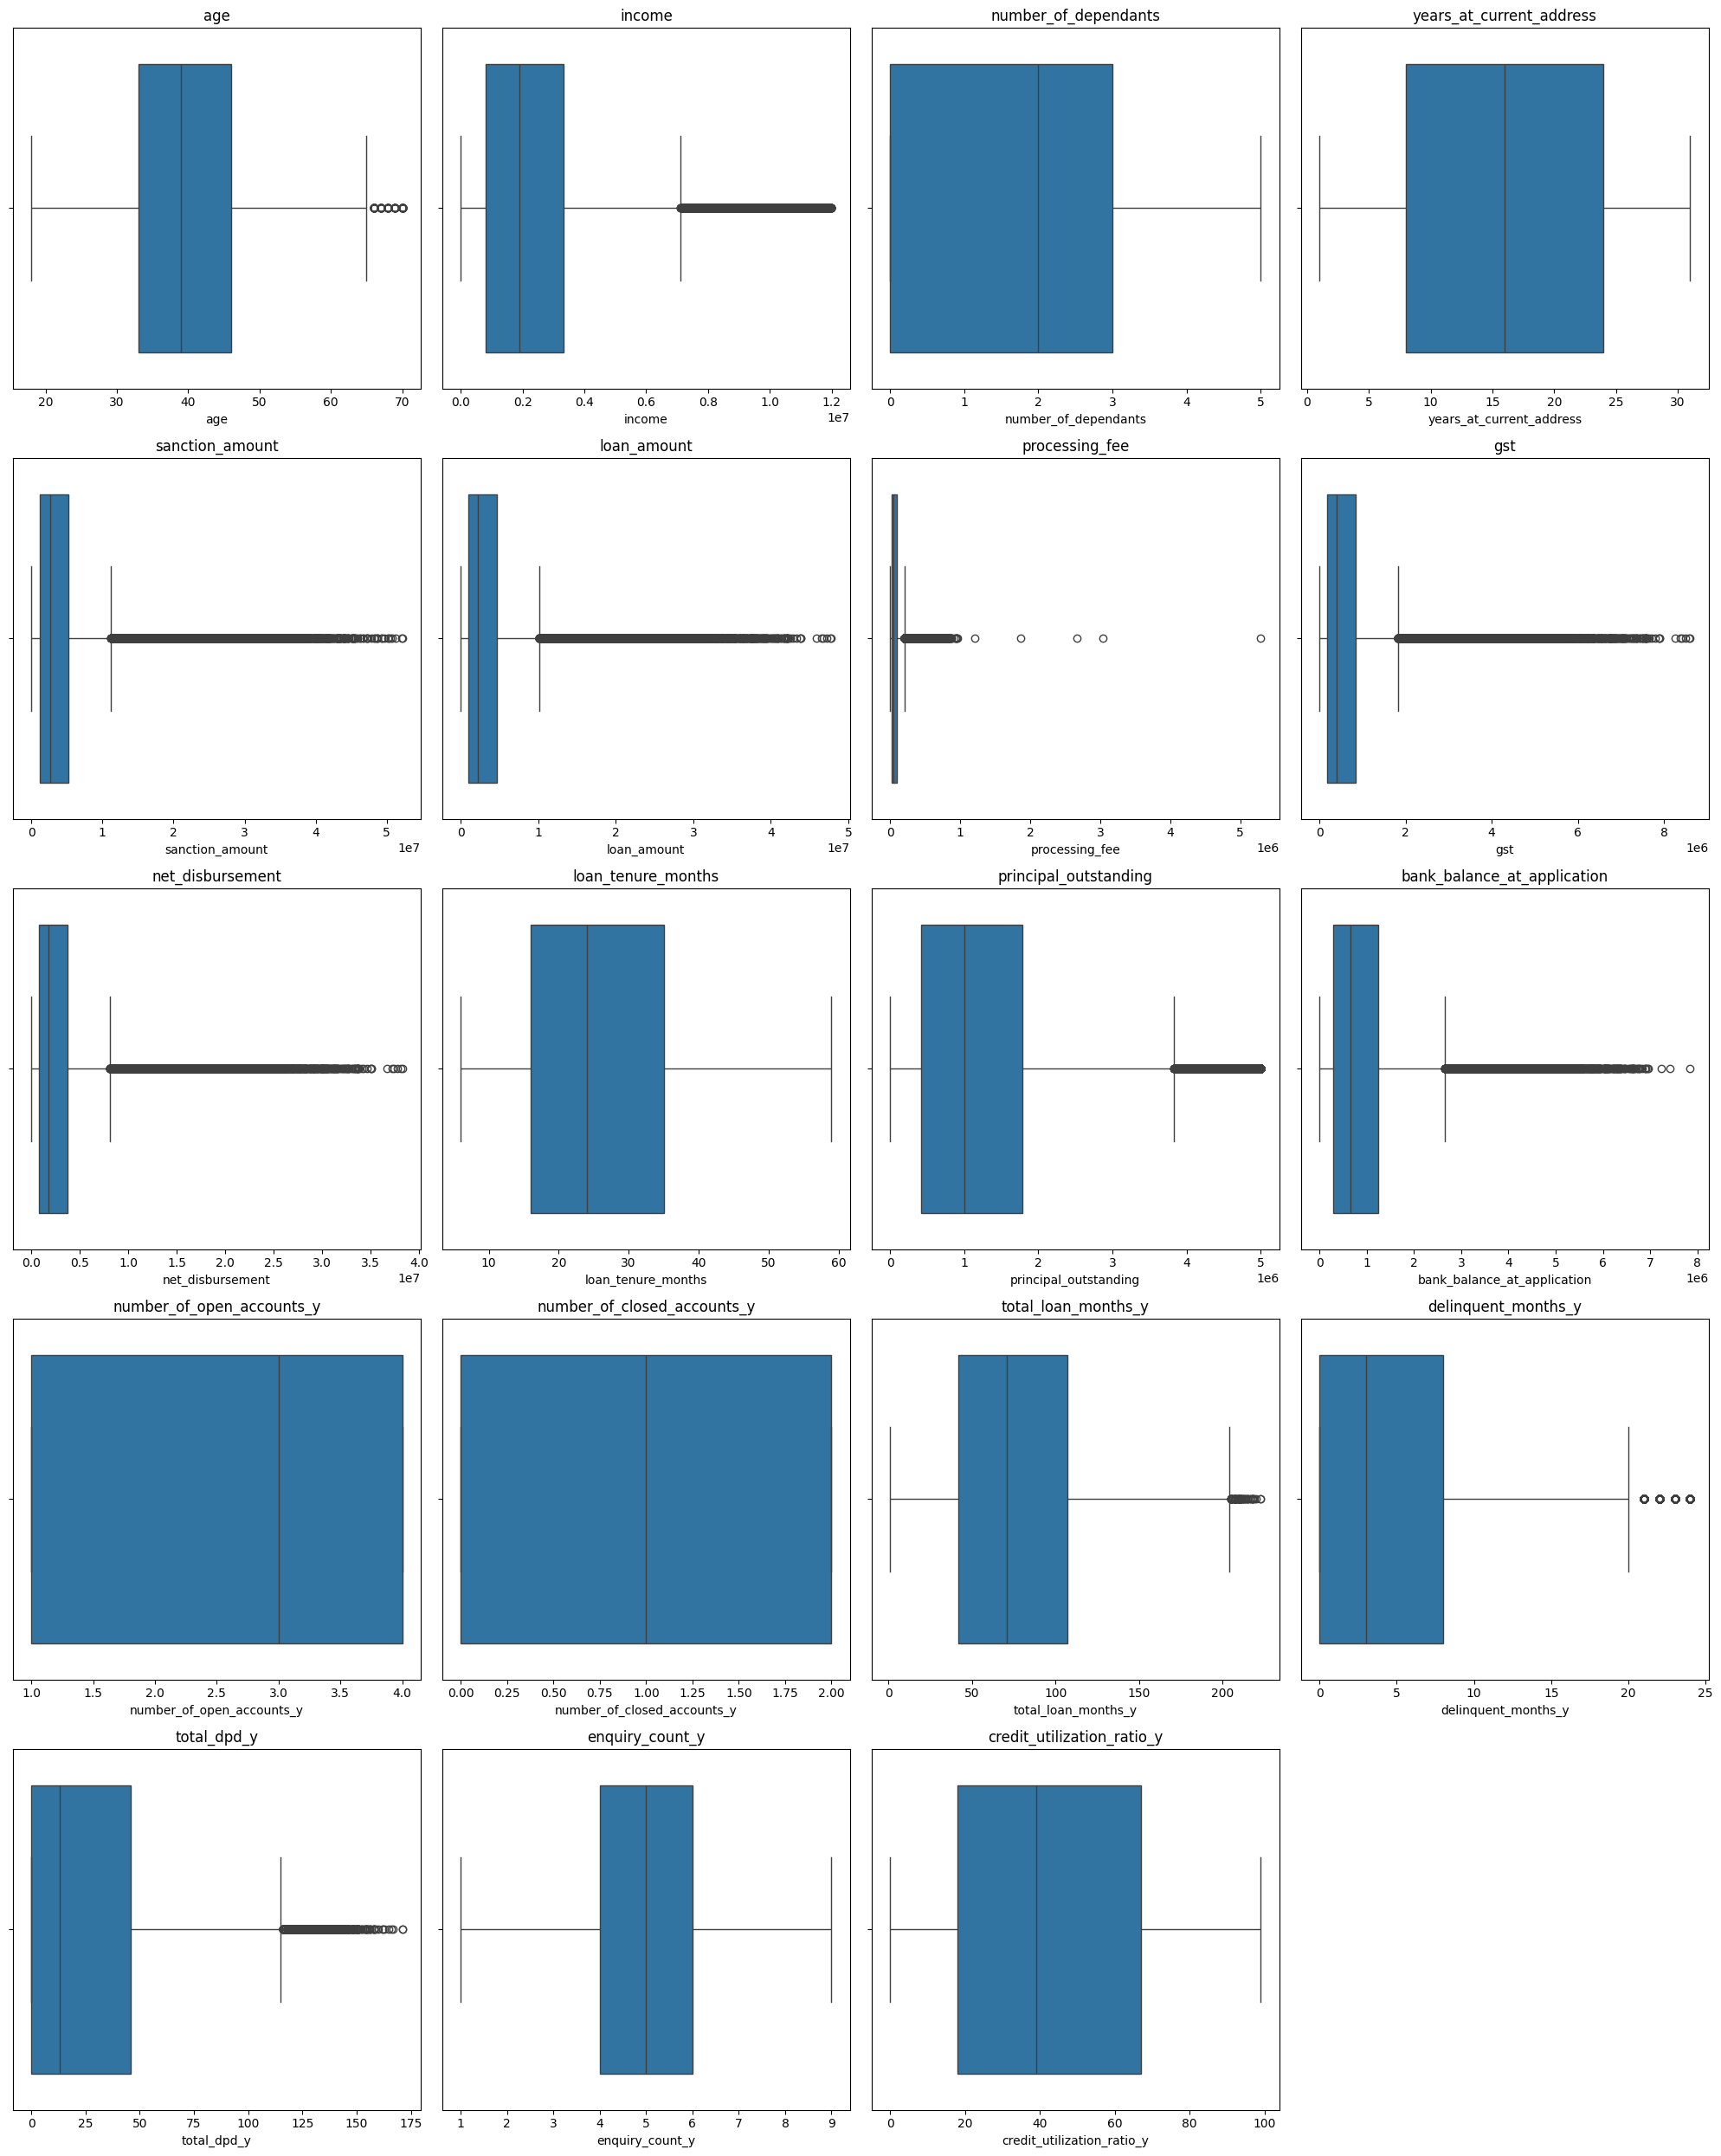

In [51]:
num_plots = len(columns_continuous)
num_cols = 4  # Number of plots per row
num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate the number of rows needed

fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 5 * num_rows))  # Adjust the figure size as needed
axes = axes.flatten()  # Flatten the axes array for easier indexing

for i, col in enumerate(columns_continuous):
    sns.boxplot(x=df_train[col], ax=axes[i])
    axes[i].set_title(col)  # Set the title to the name of the variable

# If there are any empty plots (if the number of plots isn't a perfect multiple of num_cols), hide the axes
for j in range(i + 1, num_rows * num_cols):
    axes[j].axis('off')

plt.tight_layout()
plt.show()



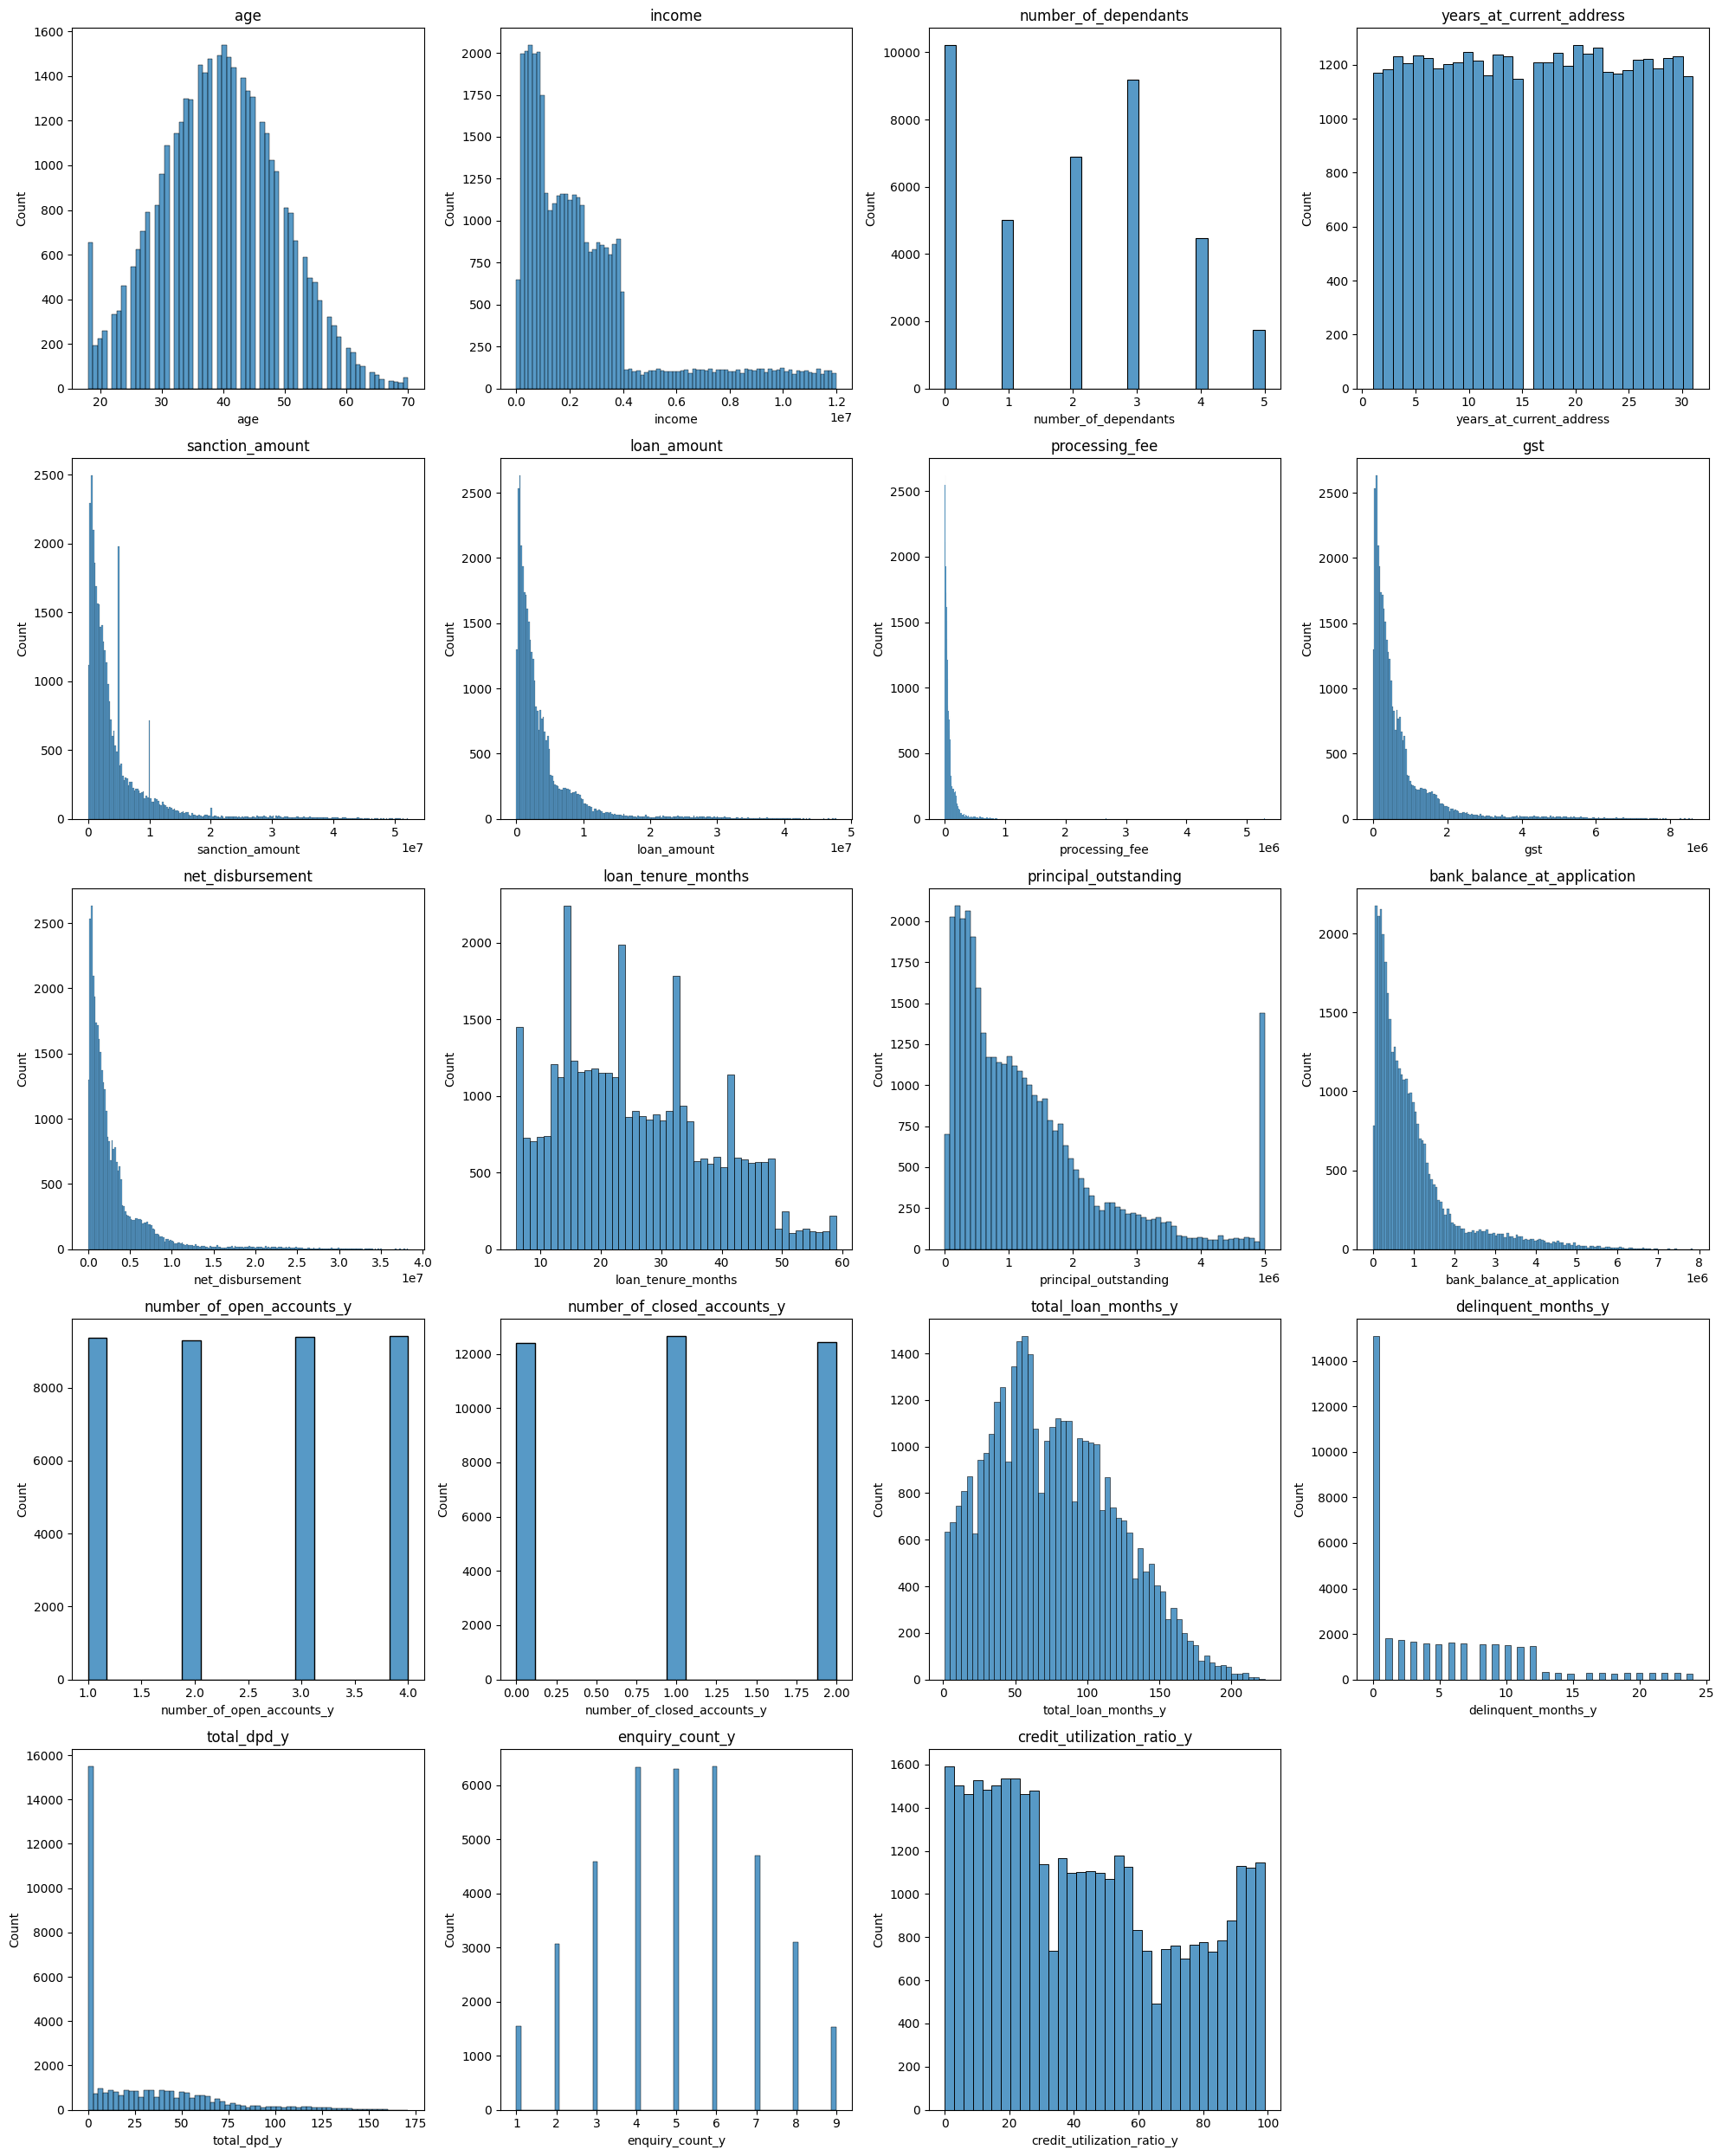

In [55]:
num_plots = len(columns_continuous)
num_cols = 4  # Number of plots per row
num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate the number of rows needed

fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 5 * num_rows))  # Adjust the figure size as needed
axes = axes.flatten()  # Flatten the axes array for easier indexing

for i, col in enumerate(columns_continuous):
    sns.histplot(df_train[col], ax=axes[i])
    axes[i].set_title(col)  # Set the title to the name of the variable

# If there are any empty plots (if the number of plots isn't a perfect multiple of num_cols), hide the axes
for j in range(i + 1, num_rows * num_cols):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [69]:
df_train.processing_fee.describe()

count     37500.00
mean      80290.68
std      113128.14
min           0.00
25%       19220.00
50%       44600.00
75%       92420.00
max     5293543.52
Name: processing_fee, dtype: float64

In [70]:
df_train[(df_train.processing_fee/df_train.loan_amount)>0.03][["loan_amount","processing_fee"]]

,loan_amount,processing_fee
23981,2234000,2669791.02
28174,966000,1214492.67
47089,1738000,1858964.77
29305,2616000,3036378.01
9898,3626000,5293543.52


In [71]:
df_train_1 = df_train[df_train.processing_fee/df_train.loan_amount<0.03].copy()
df_train_1.shape

(37488, 40)

In [72]:
df_test.residence_type.isna().sum()

np.int64(0)

In [73]:
# Apply same step on test set
df_test = df_test[df_test.processing_fee/df_test.loan_amount<0.03].copy()
df_test.shape

(12497, 40)

In [74]:
# Use other business rules for data validation
# Rule 1: GST should not be more than 20%

df_train_1[(df_train_1.gst/df_train_1.loan_amount)>0.2].shape

(0, 40)

In [75]:
# Rule 2: Net disbursement should not be higher than loan_amount
df_train_1[df_train_1.net_disbursement>df_train_1.loan_amount].shape

(0, 40)

In [76]:
columns_categorical

['gender',
 'marital_status',
 'employment_status',
 'residence_type',
 'city',
 'state',
 'zipcode',
 'loan_purpose',
 'loan_type',
 'default']

In [77]:
for col in columns_categorical:
    print(col, "-->", df_train_1[col].unique())

gender --> ['M' 'F']
marital_status --> ['Married' 'Single']
employment_status --> ['Self-Employed' 'Salaried']
residence_type --> ['Owned' 'Mortgage' 'Rented']
city --> ['Hyderabad' 'Mumbai' 'Chennai' 'Bangalore' 'Pune' 'Kolkata' 'Ahmedabad'
 'Delhi' 'Lucknow' 'Jaipur']
state --> ['Telangana' 'Maharashtra' 'Tamil Nadu' 'Karnataka' 'West Bengal'
 'Gujarat' 'Delhi' 'Uttar Pradesh' 'Rajasthan']
zipcode --> [500001 400001 600001 560001 411001 700001 380001 110001 226001 302001]
loan_purpose --> ['Home' 'Education' 'Personal' 'Auto' 'Personaal']
loan_type --> ['Secured' 'Unsecured']
default --> [0 1]


In [78]:
df_train_1['loan_purpose'] = df_train_1['loan_purpose'].replace('Personaal', 'Personal')
df_train_1['loan_purpose'].unique()

array(['Home', 'Education', 'Personal', 'Auto'], dtype=object)

In [79]:
df_test['loan_purpose'] = df_test['loan_purpose'].replace('Personaal', 'Personal')
df_test['loan_purpose'].unique()

array(['Home', 'Education', 'Auto', 'Personal'], dtype=object)

In [80]:
columns_continuous

['age',
 'income',
 'number_of_dependants',
 'years_at_current_address',
 'sanction_amount',
 'loan_amount',
 'processing_fee',
 'gst',
 'net_disbursement',
 'loan_tenure_months',
 'principal_outstanding',
 'bank_balance_at_application',
 'number_of_open_accounts_y',
 'number_of_closed_accounts_y',
 'total_loan_months_y',
 'delinquent_months_y',
 'total_dpd_y',
 'enquiry_count_y',
 'credit_utilization_ratio_y']

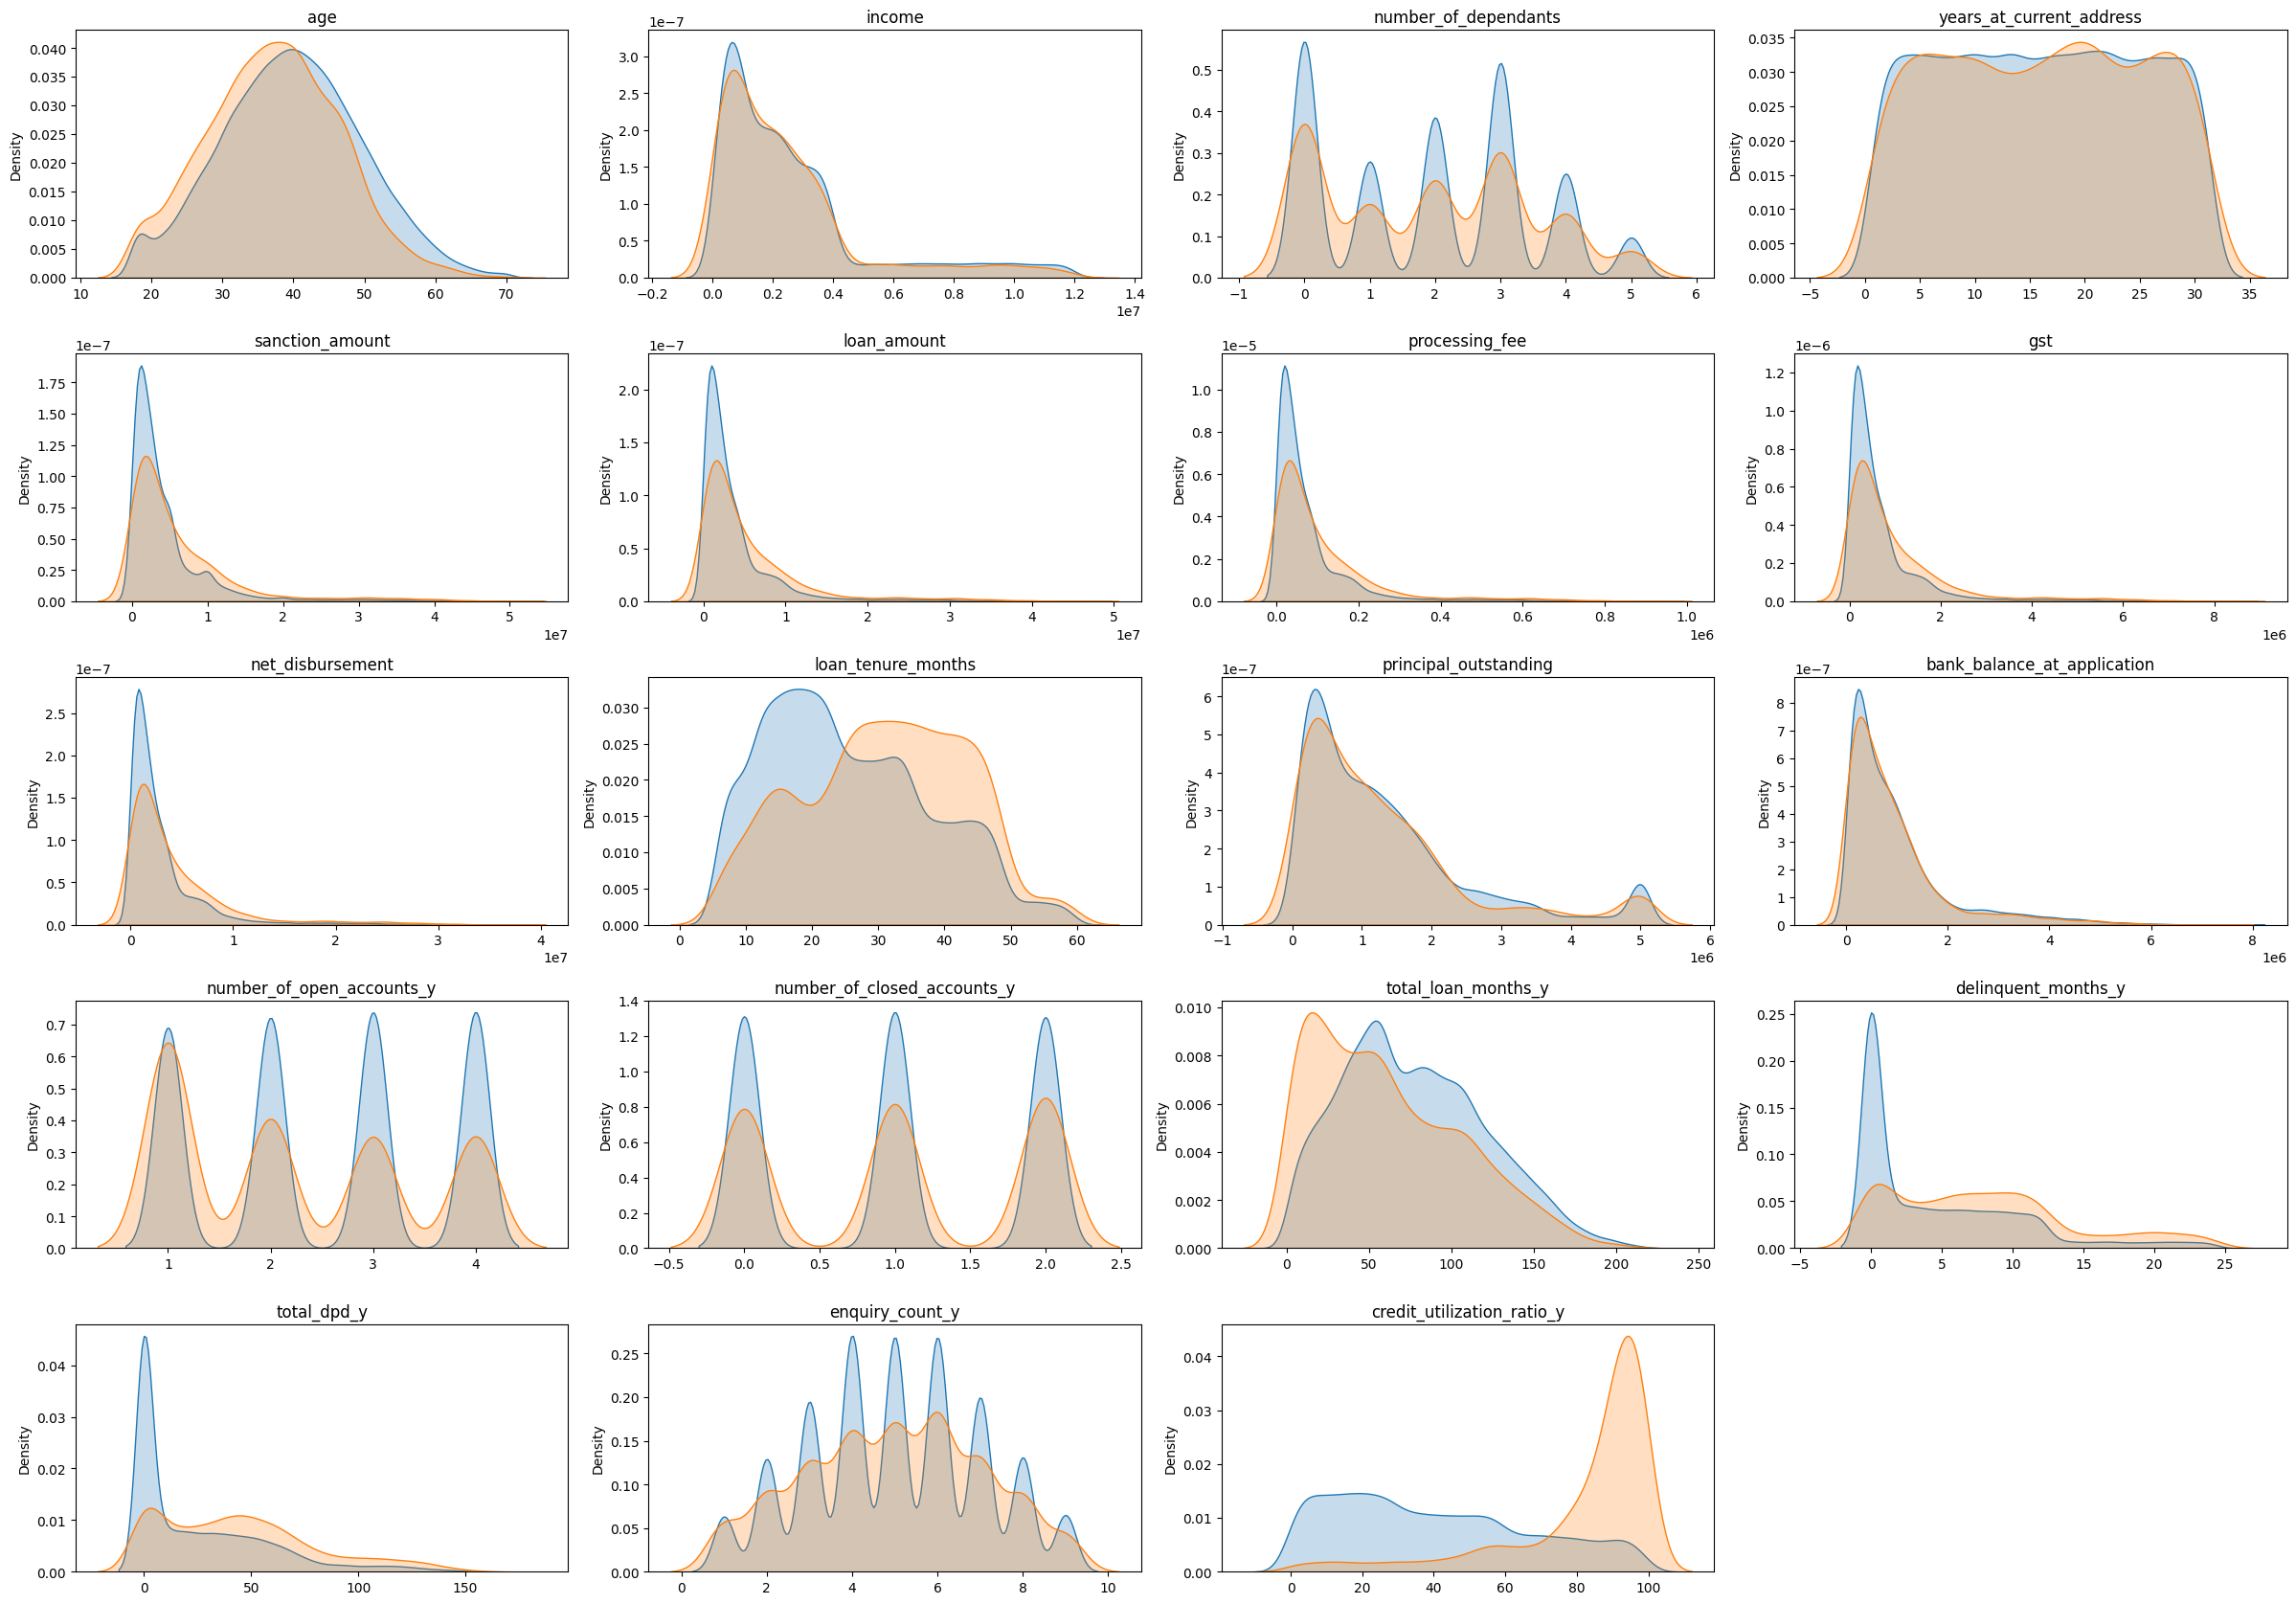

In [81]:
plt.figure(figsize=(24, 20))  # Width, height in inches

for i, col in enumerate(columns_continuous):
    plt.subplot(6, 4, i+1)  # 1 row, 4 columns, ith subplot
    sns.kdeplot(df_train_1[col][df_train_1['default']==0], fill=True, label='default=0')
    sns.kdeplot(df_train_1[col][df_train_1['default']==1], fill=True, label='default=1')
    plt.title(col)
    plt.xlabel('')

plt.tight_layout()
plt.show()

In [82]:
df_train_1[["loan_amount", "income"]].head(3)

,loan_amount,income
12746,23442000,11327000
32495,1149000,715000
43675,11296000,3195000


In [83]:
df_train_1['loan_to_income'] = round(df_train_1['loan_amount'] / df_train_1['income'],2)
df_train_1['loan_to_income'].describe()

count   37488.00
mean        1.56
std         0.97
min         0.30
25%         0.77
50%         1.16
75%         2.46
max         4.57
Name: loan_to_income, dtype: float64

In [84]:
df_test['loan_to_income'] = round(df_test['loan_amount'] / df_test['income'],2)

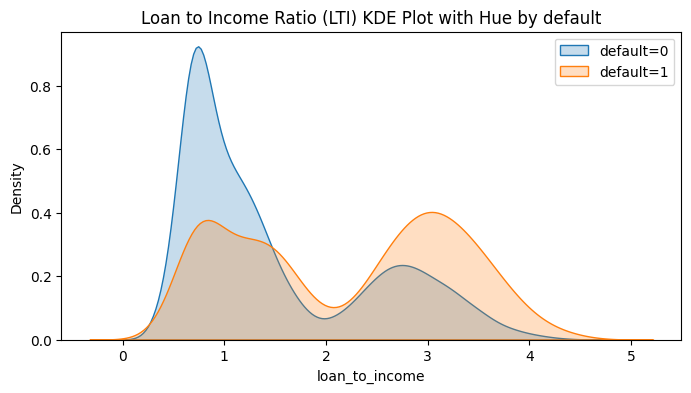

In [87]:
plt.figure(figsize=(8, 4))
sns.kdeplot(df_train_1['loan_to_income'][df_train_1['default'] == 0], fill=True, label='default=0')
sns.kdeplot(df_train_1['loan_to_income'][df_train_1['default'] == 1], fill=True, label='default=1')
plt.title(f"Loan to Income Ratio (LTI) KDE Plot with Hue by default")
plt.legend()
plt.show()

In [92]:
df_train_1['delinquency_ratio'] = (df_train_1['delinquent_months_y']*100 / df_train_1['total_loan_months_y']).round(1)
df_test['delinquency_ratio'] = (df_test['delinquent_months_y']*100 / df_test['total_loan_months_y']).round(1)

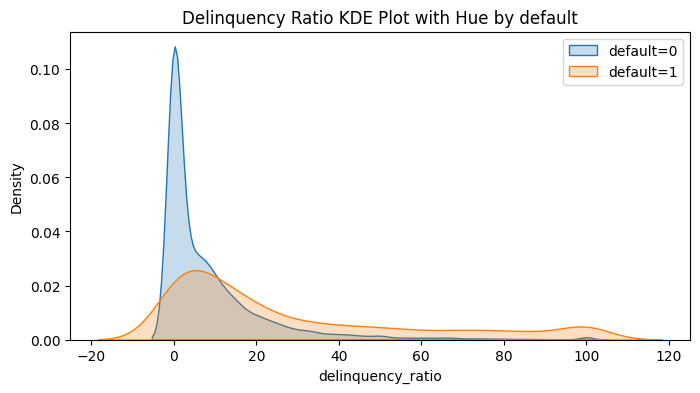

In [93]:
plt.figure(figsize=(8, 4))
sns.kdeplot(df_train_1['delinquency_ratio'][df_train_1['default'] == 0], fill=True, label='default=0')
sns.kdeplot(df_train_1['delinquency_ratio'][df_train_1['default'] == 1], fill=True, label='default=1')
plt.title(f"Delinquency Ratio KDE Plot with Hue by default")
plt.legend()
plt.show()

In [100]:
df_train_1['avg_dpd_per_delinquency'] = np.where(
    df_train_1['delinquent_months_y'] != 0,
    (df_train_1['total_dpd_y'] / df_train_1['delinquent_months_y']).round(1),
    0
)

df_test['avg_dpd_per_delinquency'] = np.where(
    df_test['delinquent_months_y'] != 0,
    (df_test['total_dpd_y'] / df_test['delinquent_months_y']).round(1),
    0
)

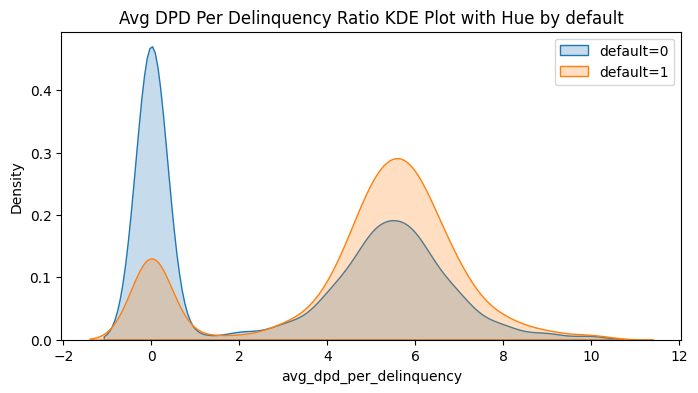

In [101]:
plt.figure(figsize=(8, 4))
sns.kdeplot(df_train_1['avg_dpd_per_delinquency'][df_train_1['default'] == 0], fill=True, label='default=0')
sns.kdeplot(df_train_1['avg_dpd_per_delinquency'][df_train_1['default'] == 1], fill=True, label='default=1')
plt.title(f"Avg DPD Per Delinquency Ratio KDE Plot with Hue by default")
plt.legend()
plt.show()

In [98]:
columns_continuous

['age',
 'income',
 'number_of_dependants',
 'years_at_current_address',
 'sanction_amount',
 'loan_amount',
 'processing_fee',
 'gst',
 'net_disbursement',
 'loan_tenure_months',
 'principal_outstanding',
 'bank_balance_at_application',
 'number_of_open_accounts_y',
 'number_of_closed_accounts_y',
 'total_loan_months_y',
 'delinquent_months_y',
 'total_dpd_y',
 'enquiry_count_y',
 'credit_utilization_ratio_y']

In [102]:
df_train_2 = df_train_1.drop(['cust_id', 'loan_id'],axis="columns")
df_test = df_test.drop(['cust_id', 'loan_id'],axis="columns")

In [104]:
df_train_3 = df_train_2.drop(['disbursal_date', 'installment_start_dt', 'loan_amount', 'income',
                              'total_loan_months_y', 'delinquent_months_y', 'total_dpd_y'], axis="columns")
df_test = df_test.drop(['disbursal_date', 'installment_start_dt', 'loan_amount', 'income',
                              'total_loan_months_y', 'delinquent_months_y', 'total_dpd_y'], axis="columns")
df_train_3.columns

Index(['age', 'gender', 'marital_status', 'employment_status',
       'number_of_dependants', 'residence_type', 'years_at_current_address',
       'city', 'state', 'zipcode', 'loan_purpose', 'loan_type',
       'sanction_amount', 'processing_fee', 'gst', 'net_disbursement',
       'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts_x',
       'number_of_closed_accounts_x', 'total_loan_months_x',
       'delinquent_months_x', 'total_dpd_x', 'enquiry_count_x',
       'credit_utilization_ratio_x', 'number_of_open_accounts_y',
       'number_of_closed_accounts_y', 'enquiry_count_y',
       'credit_utilization_ratio_y', 'default', 'loan_to_income',
       'delinquency_ratio', 'avg_dpd_per_delinquency'],
      dtype='object')

In [105]:
df_train_3.select_dtypes(['int64', 'float64']).columns

Index(['age', 'number_of_dependants', 'years_at_current_address', 'zipcode',
       'sanction_amount', 'processing_fee', 'gst', 'net_disbursement',
       'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts_x',
       'number_of_closed_accounts_x', 'total_loan_months_x',
       'delinquent_months_x', 'total_dpd_x', 'enquiry_count_x',
       'credit_utilization_ratio_x', 'number_of_open_accounts_y',
       'number_of_closed_accounts_y', 'enquiry_count_y',
       'credit_utilization_ratio_y', 'default', 'loan_to_income',
       'delinquency_ratio', 'avg_dpd_per_delinquency'],
      dtype='object')

In [106]:
X_train = df_train_3.drop('default', axis='columns')
y_train = df_train_3['default']

from sklearn.preprocessing import MinMaxScaler

cols_to_scale = X_train.select_dtypes(['int64', 'float64']).columns

scaler = MinMaxScaler()

X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
X_train.describe()

,age,number_of_dependants,years_at_current_address,zipcode,sanction_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,...,total_dpd_x,enquiry_count_x,credit_utilization_ratio_x,number_of_open_accounts_y,number_of_closed_accounts_y,enquiry_count_y,credit_utilization_ratio_y,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency
count,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,...,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00
mean,0.41,0.39,0.50,0.52,0.09,0.08,0.08,0.08,0.38,0.26,...,0.16,0.50,0.44,0.50,0.50,0.50,0.44,0.29,0.10,0.33
std,0.19,0.31,0.30,0.29,0.12,0.11,0.11,0.11,0.23,0.24,...,0.19,0.25,0.30,0.37,0.41,0.25,0.30,0.23,0.17,0.29
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.29,0.00,0.23,0.33,0.02,0.02,0.02,0.02,0.19,0.08,...,0.00,0.38,0.18,0.00,0.00,0.38,0.18,0.11,0.00,0.00
50%,0.40,0.40,0.50,0.49,0.05,0.05,0.05,0.05,0.34,0.19,...,0.08,0.50,0.39,0.67,0.50,0.50,0.39,0.20,0.04,0.43
75%,0.54,0.60,0.77,0.76,0.10,0.10,0.10,0.10,0.55,0.35,...,0.27,0.62,0.68,1.00,1.00,0.62,0.68,0.51,0.13,0.57
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [107]:
X_test = df_test.drop('default', axis='columns')
y_test = df_test['default']

X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])
X_test.describe()

,age,number_of_dependants,years_at_current_address,zipcode,sanction_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,...,total_dpd_x,enquiry_count_x,credit_utilization_ratio_x,number_of_open_accounts_y,number_of_closed_accounts_y,enquiry_count_y,credit_utilization_ratio_y,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency
count,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,...,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00
mean,0.42,0.38,0.50,0.53,0.09,0.08,0.08,0.08,0.38,0.26,...,0.16,0.50,0.44,0.50,0.50,0.50,0.44,0.29,0.11,0.33
std,0.19,0.31,0.30,0.29,0.12,0.11,0.11,0.11,0.23,0.25,...,0.19,0.25,0.30,0.37,0.41,0.25,0.30,0.23,0.17,0.29
min,0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.29,0.00,0.23,0.33,0.02,0.02,0.02,0.02,0.19,0.08,...,0.00,0.38,0.18,0.00,0.00,0.38,0.18,0.11,0.00,0.00
50%,0.42,0.40,0.50,0.51,0.05,0.05,0.05,0.05,0.34,0.20,...,0.09,0.50,0.39,0.33,0.50,0.50,0.39,0.20,0.04,0.44
75%,0.54,0.60,0.77,0.76,0.10,0.09,0.09,0.09,0.55,0.36,...,0.27,0.62,0.68,0.67,1.00,0.62,0.68,0.50,0.13,0.58
max,1.00,1.00,1.00,1.00,0.98,0.96,0.96,0.96,1.00,1.00,...,0.94,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [108]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data):
    vif_df = pd.DataFrame()
    vif_df['Column'] = data.columns
    vif_df['VIF'] = [variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
    return vif_df

In [109]:
X_train.head(2)

,age,gender,marital_status,employment_status,number_of_dependants,residence_type,years_at_current_address,city,state,zipcode,...,total_dpd_x,enquiry_count_x,credit_utilization_ratio_x,number_of_open_accounts_y,number_of_closed_accounts_y,enquiry_count_y,credit_utilization_ratio_y,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency
12746,0.79,M,Married,Self-Employed,0.60,Owned,0.97,Hyderabad,Telangana,0.66,...,0.69,0.38,0.36,1.00,1.00,0.38,0.36,0.41,0.13,0.59
32495,0.50,F,Single,Salaried,0.00,Owned,0.87,Mumbai,Maharashtra,0.49,...,0.36,0.50,0.05,0.67,0.50,0.50,0.05,0.31,0.06,0.62


In [110]:
vif_df = calculate_vif(X_train[cols_to_scale])
vif_df

C:\Users\M.Zaid Naeem\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Column,VIF
0,age,5.77
1,number_of_dependants,2.73
2,years_at_current_address,3.45
3,zipcode,3.83
4,sanction_amount,101.10
5,processing_fee,inf
6,gst,inf
7,net_disbursement,inf
8,loan_tenure_months,6.19
9,principal_outstanding,16.33


In [111]:
features_to_drop_vif = ['sanction_amount', 'processing_fee', 'gst', 'net_disbursement','principal_outstanding']


X_train_1 = X_train.drop(features_to_drop_vif, axis='columns')
numeric_columns = X_train_1.select_dtypes(['int64', 'float64']).columns
numeric_columns

Index(['age', 'number_of_dependants', 'years_at_current_address', 'zipcode',
       'loan_tenure_months', 'bank_balance_at_application',
       'number_of_open_accounts_x', 'number_of_closed_accounts_x',
       'total_loan_months_x', 'delinquent_months_x', 'total_dpd_x',
       'enquiry_count_x', 'credit_utilization_ratio_x',
       'number_of_open_accounts_y', 'number_of_closed_accounts_y',
       'enquiry_count_y', 'credit_utilization_ratio_y', 'loan_to_income',
       'delinquency_ratio', 'avg_dpd_per_delinquency'],
      dtype='object')

In [112]:
vif_df = calculate_vif(X_train_1[numeric_columns])
vif_df

C:\Users\M.Zaid Naeem\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Column,VIF
0,age,5.50
1,number_of_dependants,2.73
2,years_at_current_address,3.43
3,zipcode,3.82
4,loan_tenure_months,6.03
5,bank_balance_at_application,1.81
6,number_of_open_accounts_x,inf
7,number_of_closed_accounts_x,inf
8,total_loan_months_x,10.46
9,delinquent_months_x,49.34


In [114]:
selected_numeric_features_vif = vif_df.Column.values
selected_numeric_features_vif

array(['age', 'number_of_dependants', 'years_at_current_address',
       'zipcode', 'loan_tenure_months', 'bank_balance_at_application',
       'number_of_open_accounts_x', 'number_of_closed_accounts_x',
       'total_loan_months_x', 'delinquent_months_x', 'total_dpd_x',
       'enquiry_count_x', 'credit_utilization_ratio_x',
       'number_of_open_accounts_y', 'number_of_closed_accounts_y',
       'enquiry_count_y', 'credit_utilization_ratio_y', 'loan_to_income',
       'delinquency_ratio', 'avg_dpd_per_delinquency'], dtype=object)

In [115]:
X_train_1.head()

,age,gender,marital_status,employment_status,number_of_dependants,residence_type,years_at_current_address,city,state,zipcode,...,total_dpd_x,enquiry_count_x,credit_utilization_ratio_x,number_of_open_accounts_y,number_of_closed_accounts_y,enquiry_count_y,credit_utilization_ratio_y,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency
12746,0.79,M,Married,Self-Employed,0.60,Owned,0.97,Hyderabad,Telangana,0.66,...,0.69,0.38,0.36,1.00,1.00,0.38,0.36,0.41,0.13,0.59
32495,0.50,F,Single,Salaried,0.00,Owned,0.87,Mumbai,Maharashtra,0.49,...,0.36,0.50,0.05,0.67,0.50,0.50,0.05,0.31,0.06,0.62
43675,0.38,M,Single,Salaried,0.00,Mortgage,0.83,Chennai,Tamil Nadu,0.83,...,0.39,0.38,0.00,0.00,0.50,0.38,0.00,0.76,0.22,0.56
9040,0.46,M,Married,Salaried,0.40,Mortgage,0.97,Bangalore,Karnataka,0.76,...,0.00,0.88,0.88,0.67,0.00,0.88,0.88,0.19,0.00,0.00
13077,0.77,M,Married,Self-Employed,0.80,Owned,0.93,Pune,Maharashtra,0.51,...,0.00,0.00,0.72,0.00,1.00,0.00,0.72,0.05,0.00,0.00


In [116]:
def calculate_woe_iv(df, feature, target):
    grouped = df.groupby(feature)[target].agg(['count','sum'])
    grouped = grouped.rename(columns={'count': 'total', 'sum': 'good'})
    grouped['bad']=grouped['total']-grouped['good']

    total_good = grouped['good'].sum()
    total_bad = grouped['bad'].sum()

    grouped['good_pct'] = grouped['good'] / total_good
    grouped['bad_pct'] = grouped['bad'] / total_bad
    grouped['woe'] = np.log(grouped['good_pct']/ grouped['bad_pct'])
    grouped['iv'] = (grouped['good_pct'] -grouped['bad_pct'])*grouped['woe']

    grouped['woe'] = grouped['woe'].replace([np.inf, -np.inf], 0)
    grouped['iv'] = grouped['iv'].replace([np.inf, -np.inf], 0)

    total_iv = grouped['iv'].sum()

    return grouped, total_iv

grouped, total_iv = calculate_woe_iv(pd.concat([X_train_1, y_train],axis=1), 'loan_purpose', 'default')
grouped

,total,good,bad,good_pct,bad_pct,woe,iv
loan_purpose,,,,,,,
Auto,7447,327,7120,0.10,0.21,-0.72,0.08
Education,5620,559,5061,0.17,0.15,0.16,0.00
Home,11304,1734,9570,0.54,0.28,0.66,0.17
Personal,13117,603,12514,0.19,0.37,-0.67,0.12


In [117]:
X_train_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37488 entries, 12746 to 37784
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age                          37488 non-null  float64
 1   gender                       37488 non-null  object 
 2   marital_status               37488 non-null  object 
 3   employment_status            37488 non-null  object 
 4   number_of_dependants         37488 non-null  float64
 5   residence_type               37488 non-null  object 
 6   years_at_current_address     37488 non-null  float64
 7   city                         37488 non-null  object 
 8   state                        37488 non-null  object 
 9   zipcode                      37488 non-null  float64
 10  loan_purpose                 37488 non-null  object 
 11  loan_type                    37488 non-null  object 
 12  loan_tenure_months           37488 non-null  float64
 13  bank_balance_at_a

In [118]:
iv_values = {}

for feature in X_train_1.columns:
    if X_train_1[feature].dtype == 'object':
        _, iv = calculate_woe_iv(pd.concat([X_train_1, y_train],axis=1), feature, 'default' )
    else:
        X_binned = pd.cut(X_train_1[feature], bins=10, labels=False)
        _, iv = calculate_woe_iv(pd.concat([X_binned, y_train],axis=1), feature, 'default' )
    iv_values[feature] = iv

iv_values

{'age': np.float64(0.0890689462679479),
 'gender': np.float64(0.00047449502170914947),
 'marital_status': np.float64(0.001129766845390142),
 'employment_status': np.float64(0.003953046301722585),
 'number_of_dependants': np.float64(0.0019380899135053508),
 'residence_type': np.float64(0.246745268718145),
 'years_at_current_address': np.float64(0.0020800513608156363),
 'city': np.float64(0.0019059578709781529),
 'state': np.float64(0.0019005589806779287),
 'zipcode': np.float64(0.0016677413243392572),
 'loan_purpose': np.float64(0.3691197842282755),
 'loan_type': np.float64(0.16319324904149224),
 'loan_tenure_months': np.float64(0.21893515090196278),
 'bank_balance_at_application': np.float64(0.0063187993277516365),
 'number_of_open_accounts_x': np.float64(0.08463134083005877),
 'number_of_closed_accounts_x': np.float64(0.0011964272592421567),
 'total_loan_months_x': np.float64(0.19035214531157887),
 'delinquent_months_x': np.float64(0.3539827933970574),
 'total_dpd_x': np.float64(0.349

In [119]:
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))

iv_df = pd.DataFrame(list(iv_values.items()), columns=['Feature', 'IV'])
iv_df = iv_df.sort_values(by='IV', ascending=False)
iv_df

,Feature,IV
20,credit_utilization_ratio_x,2.353
24,credit_utilization_ratio_y,2.353
26,delinquency_ratio,0.717
25,loan_to_income,0.476
27,avg_dpd_per_delinquency,0.402
10,loan_purpose,0.369
17,delinquent_months_x,0.354
18,total_dpd_x,0.349
5,residence_type,0.247
12,loan_tenure_months,0.219


In [120]:
# select features that has IV > 0.02
selected_features_iv = [feature for feature, iv in iv_values.items() if iv > 0.02]
selected_features_iv

['age',
 'residence_type',
 'loan_purpose',
 'loan_type',
 'loan_tenure_months',
 'number_of_open_accounts_x',
 'total_loan_months_x',
 'delinquent_months_x',
 'total_dpd_x',
 'credit_utilization_ratio_x',
 'number_of_open_accounts_y',
 'credit_utilization_ratio_y',
 'loan_to_income',
 'delinquency_ratio',
 'avg_dpd_per_delinquency']

In [121]:
X_train_reduced = X_train_1[selected_features_iv]
X_test_reduced = X_test[selected_features_iv]

In [122]:
X_train_encoded = pd.get_dummies(X_train_reduced, drop_first=True)
X_train_encoded.head(3)

,age,loan_tenure_months,number_of_open_accounts_x,total_loan_months_x,delinquent_months_x,total_dpd_x,credit_utilization_ratio_x,number_of_open_accounts_y,credit_utilization_ratio_y,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency,residence_type_Owned,residence_type_Rented,loan_purpose_Education,loan_purpose_Home,loan_purpose_Personal,loan_type_Unsecured
12746,0.788,0.415,1.000,0.680,0.833,0.690,0.364,1.000,0.364,0.415,0.132,0.590,True,False,False,True,False,False
32495,0.500,0.830,0.667,0.716,0.417,0.363,0.051,0.667,0.051,0.307,0.062,0.620,True,False,True,False,False,False
43675,0.385,0.491,0.000,0.239,0.500,0.392,0.000,0.000,0.000,0.759,0.222,0.560,False,False,False,True,False,False


In [123]:
X_test_encoded = pd.get_dummies(X_test_reduced, drop_first=True)
X_test_encoded.head(3)

,age,loan_tenure_months,number_of_open_accounts_x,total_loan_months_x,delinquent_months_x,total_dpd_x,credit_utilization_ratio_x,number_of_open_accounts_y,credit_utilization_ratio_y,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency,residence_type_Owned,residence_type_Rented,loan_purpose_Education,loan_purpose_Home,loan_purpose_Personal,loan_type_Unsecured
19205,0.346,0.755,0.333,0.185,0.000,0.000,0.990,0.333,0.990,0.550,0.000,0.000,True,False,False,True,False,False
15514,0.481,0.226,1.000,0.559,0.000,0.000,0.323,1.000,0.323,0.220,0.000,0.000,True,False,True,False,False,False
30367,0.231,0.547,0.667,0.338,0.000,0.000,0.828,0.667,0.828,0.180,0.000,0.000,True,False,False,False,False,False


In [124]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model = LogisticRegression()
model.fit(X_train_encoded, y_train)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     11423
           1       0.84      0.73      0.78      1074

    accuracy                           0.97     12497
   macro avg       0.91      0.86      0.88     12497
weighted avg       0.96      0.97      0.96     12497



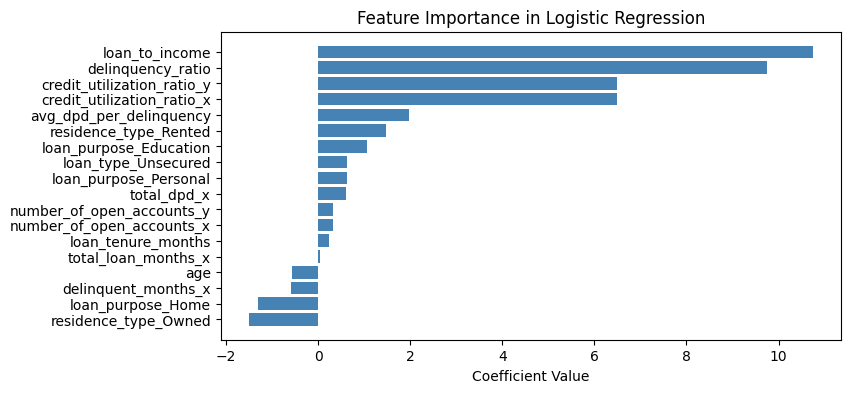

In [125]:
feature_importance = model.coef_[0]

# Create a DataFrame for easier handling
coef_df = pd.DataFrame(feature_importance, index=X_train_encoded.columns, columns=['Coefficients'])

# Sort the coefficients for better visualization
coef_df = coef_df.sort_values(by='Coefficients', ascending=True)

# Plotting
plt.figure(figsize=(8, 4))
plt.barh(coef_df.index, coef_df['Coefficients'], color='steelblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in Logistic Regression')
plt.show()

In [126]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train_encoded, y_train)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     11423
           1       0.84      0.71      0.77      1074

    accuracy                           0.96     12497
   macro avg       0.91      0.85      0.88     12497
weighted avg       0.96      0.96      0.96     12497



In [127]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train_encoded, y_train)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     11423
           1       0.81      0.78      0.79      1074

    accuracy                           0.97     12497
   macro avg       0.90      0.88      0.89     12497
weighted avg       0.96      0.97      0.97     12497



In [128]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'C': np.logspace(-4, 4, 20),  # Logarithmically spaced values from 10^-4 to 10^4
    'solver': ['lbfgs', 'saga', 'liblinear', 'newton-cg']   # Algorithm to use in the optimization problem
}

# Create the Logistic Regression model
log_reg = LogisticRegression(max_iter=10000)  # Increased max_iter for convergence

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=log_reg,
    param_distributions=param_dist,
    n_iter=50,  # Number of parameter settings that are sampled
    scoring='f1',
    cv=3,  # 5-fold cross-validation
    verbose=2,
    random_state=42,  # Set a random state for reproducibility
    n_jobs=-1  # Use all available cores
)

# Fit the RandomizedSearchCV to the training data
random_search.fit(X_train_encoded, y_train)

# Print the best parameters and best score
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Score: {random_search.best_score_}")

best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_encoded)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters: {'solver': 'liblinear', 'C': np.float64(1438.44988828766)}
Best Score: 0.7588877507120889
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     11423
           1       0.83      0.73      0.78      1074

    accuracy                           0.96     12497
   macro avg       0.90      0.86      0.88     12497
weighted avg       0.96      0.96      0.96     12497



In [129]:
from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV

# Define parameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'scale_pos_weight': [1, 2, 3, 5, 7, 10],
    'reg_alpha': [0.01, 0.1, 0.5, 1.0, 5.0, 10.0],  # L1 regularization term
    'reg_lambda': [0.01, 0.1, 0.5, 1.0, 5.0, 10.0]  # L2 regularization term
}

xgb = XGBClassifier()

random_search = RandomizedSearchCV(estimator=xgb, param_distributions=param_dist, n_iter=100,
                                   scoring='f1', cv=3, verbose=1, n_jobs=-1, random_state=42)

random_search.fit(X_train_encoded, y_train)

# Print the best parameters and best score
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Score: {random_search.best_score_}")

best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_encoded)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Parameters: {'subsample': 0.7, 'scale_pos_weight': 2, 'reg_lambda': 10.0, 'reg_alpha': 0.01, 'n_estimators': 100, 'max_depth': 4, 'learning_rate': 0.2, 'colsample_bytree': 0.8}
Best Score: 0.7877581186597586
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98     11423
           1       0.76      0.85      0.80      1074

    accuracy                           0.96     12497
   macro avg       0.87      0.91      0.89     12497
weighted avg       0.97      0.96      0.97     12497

